In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from scipy.stats import binom

In [2]:
# Hay una ruleta en un casino. La ruleta tiene 18 espacios rojos, 18 espacios negros y 2 espacios verdes
# Al girar la ruleta si sale rojo el apostador gana 1$ caso contrario el apostador pierde 1$
# Desde la vista del casino si sale rojo el casino pierde un 1$ caso contrario el casino gana 1$
ruleta = ["rojo"]*18 + ["negro"]*18 + ["verde"]*2

#simular 1000 estracciones
# cuanto gana o pierde el casino al terminar el experimento

In [3]:
def roulette_casino_profit(spins):
    casino_profit = 0
    for _ in range(spins):
        spin_result = random.choice(ruleta)
        if spin_result == "rojo":
            casino_profit -= 1
        else:
            casino_profit += 1
    return casino_profit
result = roulette_casino_profit(1000)
print("El casino", "ganó" if result > 0 else "perdió", abs(result), "$ en 1000 tiradas")

El casino ganó 40 $ en 1000 tiradas


In [4]:
def roullete_spins (spins=1000, roullete=ruleta):
    earnings = 0
    for _ in range(spins):
        result = random.choice(roullete)
        if result == "rojo":
            earnings -= 1
        else:
            earnings += 1
    return earnings

In [5]:
roullete_spins()

54

In [6]:
#Sampling model
samplings = []
for _ in range(10000):
    samplings.append(roullete_spins())

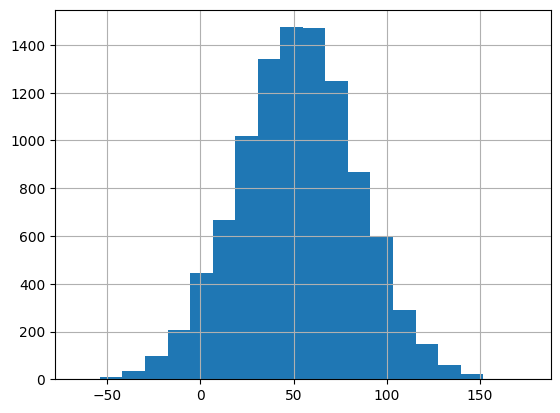

In [7]:
#Plot frecuency histogram
plt.hist(samplings,bins=20)
plt.grid(True)
plt.show()

In [8]:
#Standard error
std = np.std(samplings)
std

np.float64(31.58643378097629)

In [9]:
n = len(samplings)
n

10000

In [10]:
#Standard error = std/raiz de n
std/np.sqrt(n)

np.float64(0.3158643378097629)

In [11]:
#Bernoulli distribution: es una distribucion de probabilidad discreta de una variable aleatoria que toma el valor de 1 con probabilidad "p" y el valor 0 con probabilidad "1-p"
# Un ejemplo basico es el lanzamiento de una moneda donde P es 0.5 para cara (osea 1), y 0.5 para sello (0). E[X]= 0.5, VAR [X]=0.25
# El segundo ejemplo es obtener 5 o 6 en un lanzamiento de dado, donde acertar 1 tiene P 1/6 + 1/6 = 2/6 y la probabilidad de fallar 0 es 4/6 E[X]=1/3 VAR[X]2/6 *4/6 = 2/9
# E valor E[X] es "P" y la varianza VAR[X] es igual a "P+(1-p)"

In [12]:
# Distribucion binomial: es una distribucion de probabilidad discreta del numero de exitos en una secuencia de n experimentos independientes bernoulli donde el exito tiene probabilidad p y el fracaso tiene 1-p
# Probabilidad de sacar 3 caras en un lanzamiento de 4 monedas cada lanzamiento de moneda es un evento Bernoulli independiente de los otros lanzamientos
# Formula: P(variable aleatoria X) P(X=K)


$ P(X=K) = {n\choose K} P^K*(1-p)^{n-K} $

$ {n\choose K} = n!/(K! * n-K!) $
$ n! = n * (n-1) * (n-2)...*1


In [13]:
#El valor esperado de la distribucion binomial E[X] = n*P y la varianza es VAR[X] = n*P * (1-P)


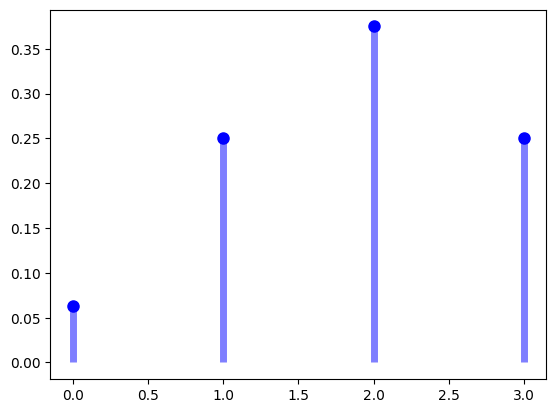

In [14]:
# Hay un evento n que es la probabilidad de sacar 3 caras en un lanzamiento de 4 monedas
n, p = 4, 0.5
rv = binom(n, p)
fig, ax = plt.subplots(1, 1)
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
ax.plot(x,binom.pmf(x, n, p),"bo", ms=8, label="funcion de probabilidad masa")
ax.vlines(x, 0, binom.pmf(x, n, p), colors = "b", lw = 5, alpha = 0.5)
plt.show()


In [15]:
# Poisson distributio: es una distribucion de probabilidad discreta que expresa la probabilidad de que un numero dado de evento ocurra en un intervalo fijo de tiempo a una tasa media constante (tasa media constante lambda)


$$ P(X=k) =\frac{ \lambda^k * e^{-\lambda} } {k!} $$

In [16]:
# El valor esperado de X E[X] = lambda y VAR[X] = lambda

In [17]:
# Normal distribution: es una distribucion de probabilidad continua para una variable aleatoria en el espacio continuo y esta representada por su media mu y su desviacion estandar "sigma"

$$ P(X = \mu\sigma) = \frac {1}{\sqrt{2\pi\sigma^2}} * e^{\frac{-(X-\mu)^2}{2\sigma^2}} $$

In [18]:
# El valor esperado E[x] es "mu" y la VAR[X] es sigma al cuadrado